In [1]:
import sys
sys.path.append("../")

import numpy as np
from quantum_compiler.ShapeModule import setFunc
from quantum_compiler.WaveModule import Wave, Waveform,QubitChannel
from instruments.drivers.Tektronix.Tektronix_AWG import AWG5208

In [2]:
# connect to AWG
awg = AWG5208(
    inst_name='AWG5208',
    inst_address='TCPIP0::192.168.10.42::inst0::INSTR')

# help(awg)

# set sampling rate and reference clock
awg.set_sample_rate(sample_rate=1.0E9)
awg.set_extref_source(ref_freq=10E6)
awg.clr_wfm()
awg.clr_seq()

Connect Instrument:
instrument: AWG5208
statement: TEKTRONIX,AWG5208,B030597,FV:6.6.0131.0


plot size=[6.4,4.8]


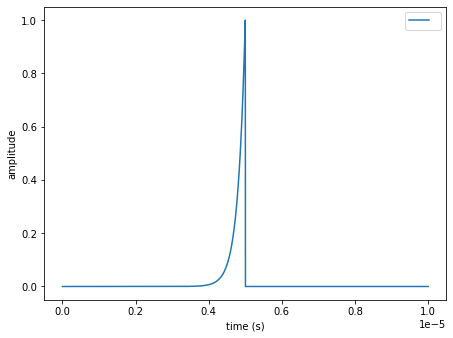

plot size=[6.4,4.8]


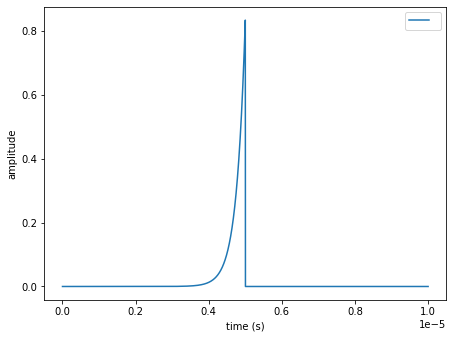

plot size=[6.4,4.8]


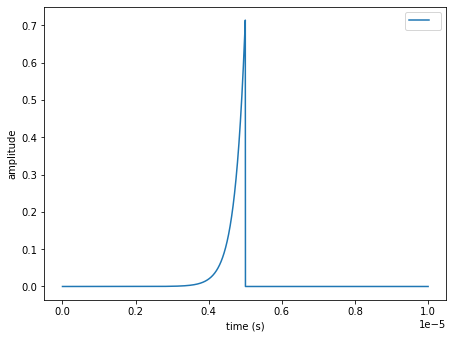

plot size=[6.4,4.8]


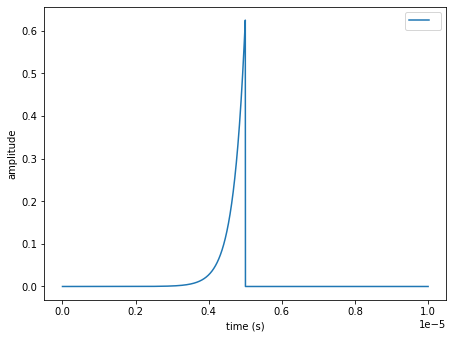

plot size=[6.4,4.8]


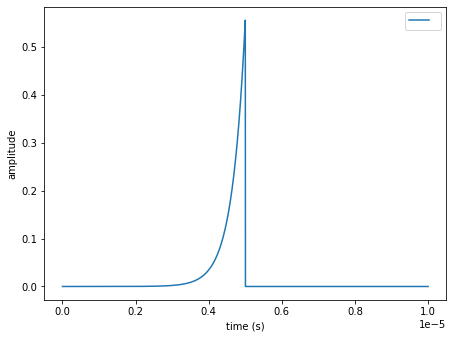

plot size=[6.4,4.8]


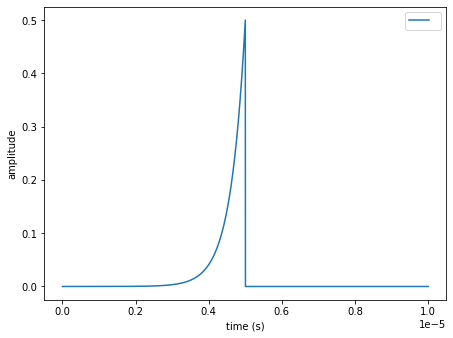

plot size=[6.4,4.8]


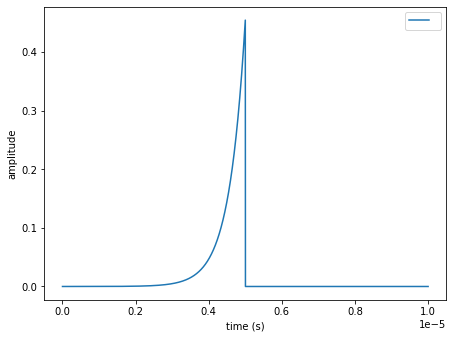

plot size=[6.4,4.8]


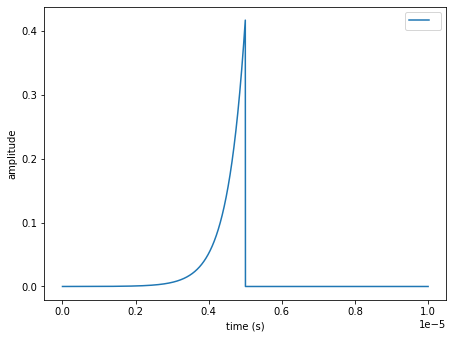

plot size=[6.4,4.8]


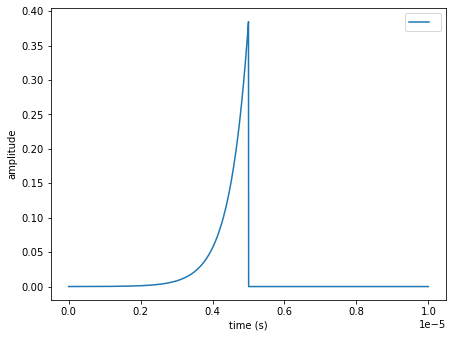

plot size=[6.4,4.8]


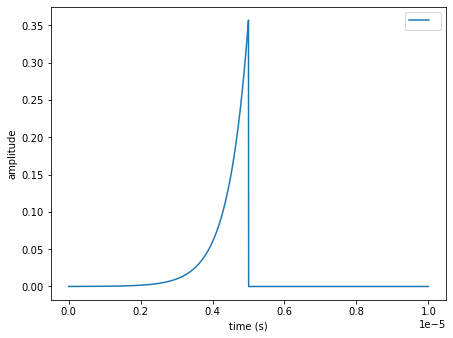

plot size=[6.4,4.8]


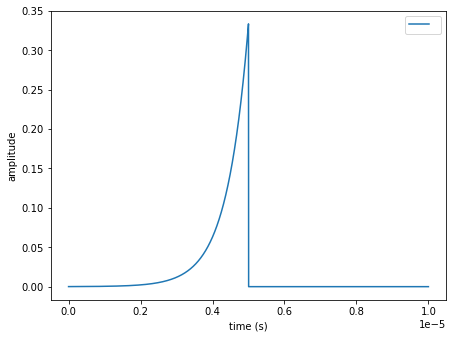

plot size=[6.4,4.8]


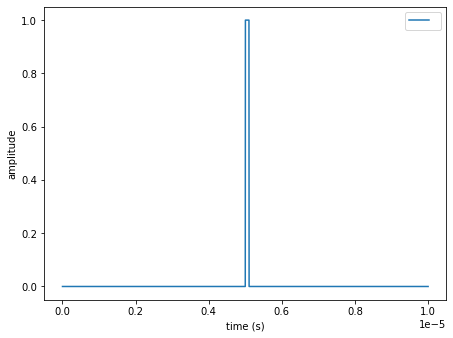

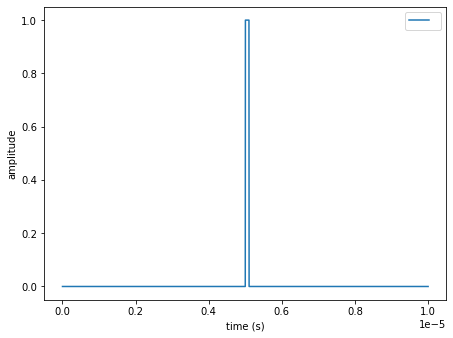

In [3]:
# make the same area exp rising pulse
exp_peak = 5e-6
StartOffset = exp_peak
exp_rising_amp = 1
tau = 200e-9
num_cases = 11
tau_array = np.linspace(tau,600e-9,num_cases)


rabi_area = exp_rising_amp*(tau-tau*np.exp(-1*(exp_peak/tau)))

for pulse_length in tau_array:
    #print(ampx)
    ampx = rabi_area/(pulse_length-pulse_length*np.exp(-1*exp_peak /pulse_length))

    a = ~(ampx*Wave(setFunc('exp_rising', {'peak_x': exp_peak,'tau':pulse_length}, 10e-6)))
    a.plot()

# make the flux tunning pulse
d_tau = 100e-9
flat = 100e-9


b = ~Wave(setFunc('square', {'start': exp_peak,'flat':flat}, 10e-6))
b.plot()

In [4]:
# make the same area exp rising pulse
rabi_area = exp_rising_amp*(tau-tau*np.exp(-1*(exp_peak/tau)))

for pulse_length in tau_array:
    ampx = rabi_area/(pulse_length-pulse_length*np.exp(-1*exp_peak /pulse_length))
    
    awg.set_wfm(wfm_name=f'rising_tau_{pulse_length}',
            wfm = (~(ampx*Wave(setFunc('exp_rising', {'peak_x': exp_peak,'tau':pulse_length}, 10e-6)))).y,
            mkr1= (~Wave(setFunc('square', {'start': 10e-9,'flat':10e-9}, 10e-6))).y
           )

# make the flux tunning pulse

awg.set_wfm(wfm_name= 'square_test',
            wfm = (~Wave(setFunc('square', {'start': exp_peak,'flat':flat}, 10e-6))).y,
           )

awg.upload_wfm()

In [5]:
seq_name='exp_rising'
trackList = ["exp_rising_tau"]

# clear, set, assign and upload
awg.clr_seq()
awg.set_seq(seq_name, num_track=len(trackList), num_step=num_cases)

for track_idx, track in enumerate(trackList):
    for step_idx, pulse_length in enumerate(tau_array):
        awg.assign_seq(f'rising_tau_{pulse_length}', seq_name, track_idx+1, step_idx+1)


awg.upload_seq(seq_name)

In [6]:
awg.assign_ch(1, seq_name, track_index=1)
awg.assign_ch(2,'square_test')